**Quadratic Programming**'

CONVEX OPTIMIZATION Assignment 2 , Question 6

Name-DEESHANT SHARMA

Roll_no-EE21MTECH14002

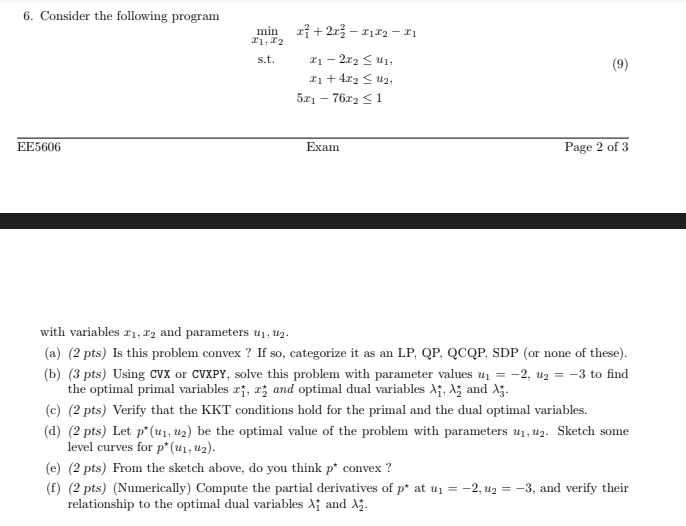

In [ ]:
#Importing libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def is_pos_def(x):
  return np.all(np.linalg.eigvals(x)>0)

In [ ]:
#Initialising with QP values
Q=np.array([[2,-1],[-1,4]])
r=np.array([-1,0])
A=np.array([[1,-2],[1,4],[5,-76]])

A=np.reshape(A,(3,2))

#CVXPY variables and parameter declaration
x=cp.Variable((2,1),name='x')
u1=cp.Parameter(name='u_1')
u2=cp.Parameter(name='u_2')
#For problem u1=-2,u2=-3
u1.value=-2
u2.value=-3
b=np.array([-2,-3,1])
b=np.reshape(b,(3,1))

#Objective
fx=0.5*cp.quad_form(x,Q)+r.T@x

#Constraints
constr=[A@x<=b]
objective=cp.Minimize(fx)

#CVXPY problem formulation
prob=cp.Problem(objective,constr)
print("CVXPY QP convex problem is",prob)
prob.solve()

#To check function is convex or not -PSD check
print("Is this problem a convex?",is_pos_def(Q))
#Printing results
print("Minimized quadratic function value is",fx.value)

print("CVXPY variable values are",x.value)

dual_values=prob.constraints[0].dual_value

print("lagrange dual values are:",dual_values)


CVXPY QP convex problem is minimize 0.5 * QuadForm(x, [[ 2. -1.]
 [-1.  4.]]) + [-1.  0.] * x
subject to [[  1.  -2.]
 [  1.   4.]
 [  5. -76.]] * x <= [[-2.]
 [-3.]
 [ 1.]]
Is this problem a convex? True
Minimized quadratic function value is [[7.44444444]]
CVXPY variable values are [[-2.33333333]
 [-0.16666667]]
lagrange dual values are: [[2.86447804]
 [2.29803246]
 [0.0674979 ]]


In [ ]:
#KKT conditions check

Q=np.array([[2,-1],[-1,4]])
r=np.array([-1,0])
A=np.array([[1,-2],[1,4],[5,-76]])
#print(A)
A=np.reshape(A,(3,2))
Q=np.reshape(Q,(2,2))
r=np.reshape(r,(2,1))
#KKT CONDITIONS CHECK
#Primal feasible
x1=x.value[0]
x2=x.value[1]
k=A@x.value-b
prim_feas=[round(k1.item(),10) for k1 in k]
print("Does problem follows Primal feasible?")
print("Primal feasible values are:",prim_feas)
print("(A@x.value-b) should be less than or equal to zero")
print("For primal feasible optimal values must satify the constraints")
print("DUAL FEASIBLE:dual variables lambda must be greater than or equal to zero:for 1st lambda value:",dual_values[0]>=0,"for 1st lambda value:",dual_values[1]>=0,"for 3rd lambda value:",dual_values[2]>=0)

constr=A@x.value-b
comp_slack=dual_values.T@constr
print("comp_slack value",comp_slack)
print("Does Complementory slackness satisfies ?:",round(comp_slack.item(),10)==0)
#print("Dual values are",dual_values)
#langragian_func=fx+lam.T(A@x.value-b)
#lagrangian derivative

lang_derivative=Q@x.value + r + (A.T@dual_values)

der=[round(k1.item(),12) for k1 in lang_derivative.ravel()]
print("Derivatives of lagrangian is:",lang_derivative)
print("Langrangian derivative must be equal to zero: Is it?",der[0]==0 and der[1]==-0)

Does problem follows Primal feasible?
Primal feasible values are: [0.0, 0.0, 0.0]
(A@x.value-b) should be less than or equal to zero
For primal feasible optimal values must satify the constraints
DUAL FEASIBLE:dual variables lambda must be greater than or equal to zero:for 1st lambda value: [ True] for 1st lambda value: [ True] for 3rd lambda value: [ True]
comp_slack value [[1.63178486e-15]]
Does Complementory slackness satisfies ?: True
Derivatives of lagrangian is: [[ 1.77635684e-15]
 [-8.88178420e-16]]
Langrangian derivative must be equal to zero: Is it? True


In [ ]:
#Using lagrange dual
#Dual is also QP
lam=cp.Variable((3,1),name='lambda')
k1=np.linalg.inv(Q)
k=A@k1@A.T
print("Lagrange dual of problem is Convex QP?",is_pos_def(k))
obj=lam.T@(-0.5*cp.quad_form(A.T,k1)@lam -b)
constr=[lam>=0]
objective=cp.Maximize(obj)


Lagrange dual of problem is Convex QP? True


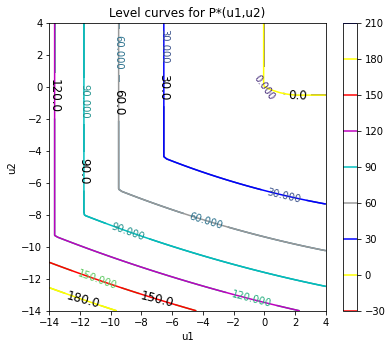

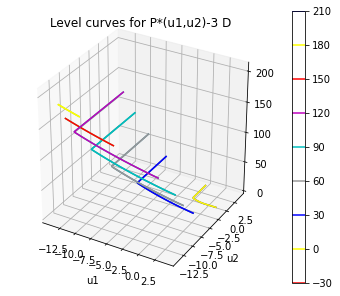

In [ ]:
#Contoor plots for different u1 and u2
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

Q=np.array([[2,-1],[-1,4]])
r=np.array([-1,0])
A=np.array([[1,-2],[1,4],[5,-76]])

A=np.reshape(A,(3,2))
Q=np.reshape(Q,(2,2))
r=np.reshape(r,(2,1))
x=cp.Variable((2,1))


u1_list=np.linspace(-14,4,100)

u2_list=np.linspace(-14,4,100)
#Initialising with QP values
Q=np.array([[2,-1],[-1,4]])
r=np.array([-1,0])
A=np.array([[1,-2],[1,4],[5,-76]])
#print(A)
A=np.reshape(A,(3,2))

#Using p*(u1,u2)=p*(-2,-3)-lam.T*[u1 u2]
p_opt_val=np.array([])
for u1 in u1_list:
  for u2 in u2_list:
    b=np.array([u1,u2,1])
    b=np.reshape(b,(3,1))
    #CVXPY variables and parameter declaration
    x=cp.Variable((2,1),name='x')

    #Objective
    fx=0.5*cp.quad_form(x,Q)+r.T@x

    #Constraints
    constr=[A@x<=b]
    objective=cp.Minimize(fx)

    #CVXPY problem formulation
    prob=cp.Problem(objective,constr)
    p_opt_val=np.append(p_opt_val,prob.solve())


#ax=plt.axes(projection='3d')
p_opt_val=np.reshape(p_opt_val,(100,100))


fig=plt.figure(figsize=(6,5))
left,bottom,width,height=0.1,0.1,0.8,0.8
ax=fig.add_axes([left,bottom,width,height])
cp=ax.contour(u1_list,u2_list,p_opt_val)
plt.clabel(cp,colors='k',fmt='%2.1f',fontsize=12)
c=('#ff0000','#ffff00','#0000FF','0.6','c','m')
colours_filled=plt.contour(u1_list,u2_list,p_opt_val,colors=c)
plt.colorbar(colours_filled)
ax.clabel(cp,inline=True,fontsize=10)
ax.set_title("Level curves for P*(u1,u2)")
ax.set_xlabel("u1")
ax.set_ylabel("u2")
plt.show()

fig=plt.figure(figsize=(6,5))
left,bottom,width,height=0.1,0.1,0.8,0.8
#ax=fig.add_axes([left,bottom,width,height])
ax=plt.axes(projection='3d')
p_opt_val=np.reshape(p_opt_val,(100,100))
cp=ax.contour(u1_list,u2_list,p_opt_val)
plt.clabel(cp,colors='k',fmt='%2.1f',fontsize=12)
c=('#ff0000','#ffff00','#0000FF','0.6','c','m')
colours_filled=plt.contour(u1_list,u2_list,p_opt_val,colors=c)
plt.colorbar(colours_filled)
ax.clabel(cp,inline=True,fontsize=10)
ax.set_title("Level curves for P*(u1,u2)-3 D")
ax.set_xlabel("u1")
ax.set_ylabel("u2")
plt.show()